In [ ]:
!pip install -qU langchain-text-splitters langchain-openai fitz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.5/500.5 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.9/425.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
%pip install langchain-opentutorial

In [ ]:
!pip install langchain-core langchain-openai langchain-classic langchain-community langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB

In [ ]:
!pip install pymupdf tabula-py


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.3 MB/s eta 0:00:00


In [ ]:
import os
import base64
import json
import logging # Added import for logging
import warnings # Added import for warnings
from typing import List, Dict, Any
from pathlib import Path
import requests


# Make sure these imports are at the top of your file

from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from openai import OpenAI
from tqdm import tqdm
import tabula
import fitz
import torch
from transformers import pipeline


logger = logging.getLogger(__name__)
logger.setLevel(logging.ERROR)

warnings.filterwarnings("ignore")

In [ ]:
# # Install Pytorch & other libraries
# %pip install "torch>=2.4.0"

# # Install a transformers version that supports Gemma 3 (>= 4.51.3)
# %pip install "transformers>=4.51.3"

In [ ]:
from google.colab import userdata
from huggingface_hub import login

# Login into Hugging Face Hub
hf_token = userdata.get('HF_TOKEN')
login(hf_token)

In [ ]:
# Downloading the dataset - URL of the "Attention Is All You Need" paper (Replace it with the URL of the PDF file/dataset you want to download)
url = "https://arxiv.org/pdf/1706.03762.pdf"

# Set the filename and filepath
filename = "attention_paper.pdf"
filepath = os.path.join("data", filename)

# Create the data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded successfully: {filepath}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully: data/attention_paper.pdf


In [ ]:
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
import os
import base64
from openai import OpenAI

client = OpenAI()


def create_directories(base_dir):
    for d in ["images", "text", "tables"]:
        os.makedirs(os.path.join(base_dir, d), exist_ok=True)


# -------------------------------------------------
# OPENAI HELPERS
# -------------------------------------------------

def summarize_table_openai(table_text):
    response = client.responses.create(
        model="gpt-4.1-mini",
        input=[
            {
                "role": "user",
                "content": f"You are an assistant tasked with summarizing tables and text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text or table elements. \
    Give a concise summary of the table or text that is well-optimized for retrieval. Table \
    or text: {table_text} "
            }
        ],
        max_output_tokens=150
    )
    return response.output_text


def summarize_image_openai(encoded_image):
    response = client.responses.create(
        model="gpt-4o",
        input=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "input_image",
                        "image_url": f"data:image/jpeg;base64,{encoded_image}"
                    },
                    {
                        "type": "input_text",
                        "text": "You are an assistant tasked with summarizing images for retrieval. \
                                These summaries will be embedded and used to retrieve the raw image. \
                                Give a concise summary of the image that is well optimized for retrieval."
                    }
                ]
            }
        ],
        max_output_tokens=120
    )
    # The Responses API returns response.output_text as a direct helper
    return response.output_text



# -------------------------------------------------
# TABLE PROCESSING
# -------------------------------------------------

def process_tables(page_num, base_dir, items, filepath):
    try:
        tables = tabula.read_pdf(
            filepath,
            pages="all",
            multiple_tables=True
        )

        if not tables:
            return

        for idx, df in enumerate(tables):
            table_text = df.to_markdown(index=False)

            table_path = (
                f"{base_dir}/tables/"
                f"{os.path.basename(filepath)}_table_{page_num}_{idx}.txt"
            )

            with open(table_path, "w", encoding="utf-8") as f:
                f.write(table_text)

            summary = summarize_table_openai(table_text)

            items.append({
                "page": page_num,
                "type": "table",
                "text": table_text,
                "summary": summary,
                "path": table_path
            })

    except Exception as e:
        print(f"[Table Error] Page {page_num}: {e}")


# -------------------------------------------------
# TEXT PROCESSING (unchanged)
# -------------------------------------------------

def process_text_chunks(text, splitter, page_num, base_dir, items, filepath):
    chunks = splitter.split_text(text)

    for i, chunk in enumerate(chunks):
        text_path = (
            f"{base_dir}/text/"
            f"{os.path.basename(filepath)}_text_{page_num}_{i}.txt"
        )

        with open(text_path, "w", encoding="utf-8") as f:
            f.write(chunk)

        items.append({
            "page": page_num,
            "type": "text",
            "text": chunk,
            "path": text_path
        })


# -------------------------------------------------
# IMAGE PROCESSING
# -------------------------------------------------

def process_images(doc, page, page_num, base_dir, items, filepath):
    images = page.get_images(full=True)

    for idx, img in enumerate(images):
        xref = img[0]
        pix = fitz.Pixmap(doc, xref)

        if pix.alpha:
            pix = fitz.Pixmap(fitz.csRGB, pix)

        image_path = (
            f"{base_dir}/images/"
            f"{os.path.basename(filepath)}_image_{page_num}_{idx}_{xref}.png"
        )

        pix.save(image_path)
        pix = None

        with open(image_path, "rb") as f:
            encoded = base64.b64encode(f.read()).decode("utf-8")

        summary = summarize_image_openai(encoded)

        items.append({
            "page": page_num,
            "type": "image",
            "path": image_path,
            "image": encoded,
            "summary": summary
        })


In [ ]:
!pip install -qU langchain-text-splitters langchain-openai


In [ ]:
import fitz
from tqdm import tqdm
from langchain_text_splitters import RecursiveCharacterTextSplitter

doc = fitz.open(filepath)
num_pages = len(doc)
base_dir = "data"

# Creating the directories
create_directories(base_dir)

splitter = RecursiveCharacterTextSplitter(
    chunk_size=700,
    chunk_overlap=200,
    length_function=len
)

items = []

# Process each page of the PDF
for page_num in tqdm(range(num_pages), desc="Processing PDF pages"):
    page = doc[page_num]
    text = page.get_text()

    process_tables(page_num, base_dir, items, filepath)
    process_text_chunks(text, splitter, page_num, base_dir, items, filepath)
    process_images(doc, page, page_num, base_dir, items, filepath)

doc.close()



Processing PDF pages:   0%|          | 0/15 [00:00<?, ?it/s]WARNING:tabula.backend:Failed to import jpype dependencies. Fallback to subprocess.
Feb 19, 2026 9:33:03 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Feb 19, 2026 9:33:03 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Feb 19, 2026 9:33:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 19, 2026 9:33:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 19, 2026 9:33:12 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode

Processing PDF pages:   7%|▋         | 1/15 [00:54<12:41, 54.37s/it]WARNING:tabula.backend:Got stderr: Feb 19, 2026 9:33:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 19, 2026 9:33:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 19, 2026 9:34:01 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode

Processing PDF pages:  13%|█▎        | 2/15 [01:29<09:20, 43.14s/it]WARNING:tabula.backend:Got stderr: Feb 19, 2026 9:34:32 AM or

In [ ]:
text_list = [item for item in items if item['type'] == 'text']
text_list[0]

{'page': 0,
 'type': 'text',
 'text': 'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or',
 'path': 'data/text/attention_paper.pdf_text_0_0.txt'}

In [ ]:
text_list[3]

{'page': 0,
 'type': 'text',
 'text': 'training for 3.5 days on eight GPUs, a small fraction of the training costs of the\nbest models from the literature. We show that the Transformer generalizes well to\nother tasks by applying it successfully to English constituency parsing both with\nlarge and limited training data.\n∗Equal contribution. Listing order is random. Jakob proposed replacing RNNs with self-attention and started\nthe effort to evaluate this idea. Ashish, with Illia, designed and implemented the first Transformer models and\nhas been crucially involved in every aspect of this work. Noam proposed scaled dot-product attention, multi-head',
 'path': 'data/text/attention_paper.pdf_text_0_3.txt'}

In [ ]:
image_list = [item for item in items if item['type'] == 'image']


In [ ]:
image_list[1]

{'page': 3,
 'type': 'image',
 'path': 'data/images/attention_paper.pdf_image_3_0_182.png',
 'image': 'iVBORw0KGgoAAAANSUhEUgAAAb0AAAN0CAIAAACvNGFGAAAACXBIWXMAAA7EAAAOxAGVKw4bAABKwUlEQVR4nO2dy88u11WnvynzMEK0dDxw/gkUITm2bEYxthsPYtpxdyfhlmDSBpKABQmQSwdHOIlIMO3OHWI3lkli4iRqK7cDcvqINCIetSMEk5bIoJmegZXedjn7rK8uu3ZV7b3Xr6qeR0vW0ef3q3e9e639fLuu78WPAKAoF6/gnQVUhOoCFObix3gnArWgtACFwZuHh9IClOTiMt7pQBWoK0BJ8OYZoK4AxbgY4J0RVIG6AhRj6E3UeUgoKkAx8OZJoKgAZRiVJuo8JFQUoAx48zxQUYACJKSJN48HFQUoQNqbqPNgUE6AAuDNU0E5AbYyK03UeTCoJcBW8ObZoJYAm8iUJt48EtQSYBP53kSdh4FCAmwCb54QCgmwnkXSRJ2HgSoCrAdvnhOqCLCSFdLEm8eAKgKsZJ03UecBoIQAa1gtTbx5ACghwBq2eBN17h3qB7AGvHlmqB/AYjZKE3XuHYoHsBi8eXIoHsAypiSYViTePBIUD2AZU/rLWVqizmNA5QCWMWW9HG/2XtYwaygJlQNYQEJ5md60L66fL1SBygGUYZE3YddQUYAy4M3zQEUByoA3zwMVBSgD3jwPVBSgDHjzPFBRgDLgzfNARQHKgDfPAxUFKAPePA9UFKAMePM8UFGAMuDN80BFAcqAN88DFQUoA948D1QUoAx48zxQUYAy4M3zQEUByoA3zwMVBSgD3jwPVBSgDHjzPFBRgDLgzfNARQHKgDfPAxUFKAPePA9UFKAMePM8UFGAMuDN80BFAcqAN88DFQUoA948D1QUoAx48zxQUYAy4M3zQEUByoA3zwMVB

In [ ]:
table_list = [item for item in items if item['type'] == 'table']
table_list[1]

{'page': 0,
 'type': 'table',
 'text': '| chose this function because we hypothesized it would allow the model to easily learn to attend by    |\n|:-----------------------------------------------------------------------------------------------------|\n| relative positions, since for any fixed offset k, PEpos+k can be represented as a linear function of |\n| PEpos.                                                                                               |\n| We also experimented with using learned positional embeddings [9] instead, and found that the two    |\n| versions produced nearly identical results (see Table 3 row (E)). We chose the sinusoidal version    |',
 'summary': 'Summary: The text explains the choice of a sinusoidal positional encoding function, hypothesizing it helps the model learn relative positions since PE at position pos+k can be linearly derived from PE at pos. It notes that learned positional embeddings were also tested, yielding nearly identical results (refe

In [ ]:
text_summaries = [text['text'] for text in text_list]
table_summaries = [table['summary'] for table in table_list]
image_summaries = [image['summary'] for image in image_list]

In [ ]:
texts = [text['text'] for text in text_list]
tables = [table['text'] for table in table_list]
images = [image['image'] for image in image_list]

In [ ]:
import uuid
# Using updated import paths
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings
from langchain_classic.retrievers import MultiVectorRetriever
from langchain_core.stores import InMemoryStore
from langchain_community.vectorstores import Chroma
import os


store = InMemoryStore()
id_key = "doc_id"
vectorstore = Chroma(
    collection_name="mm_rag_mistral",
    embedding_function = OpenAIEmbeddings(),
)

retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
    search_type="mmr",
    search_kwargs={"k": 5, "fetch_k": 10}
  )

def add_documents(retriever, doc_summaries, doc_contents):
  doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
  summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]

  retriever.vectorstore.add_documents(summary_docs)
        # mset maps IDs to the raw content (text or base64 string)
  retriever.docstore.mset(list(zip(doc_ids, doc_contents)))


if text_summaries:
  add_documents(retriever, text_summaries, texts)
if table_summaries:
  add_documents(retriever, table_summaries, tables)
if image_summaries:
  add_documents(retriever, image_summaries, images)



/tmp/ipython-input-3164482691.py:13: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the `langchain-chroma package and should be used instead. To use it run `pip install -U `langchain-chroma` and import as `from `langchain_chroma import Chroma``.
  vectorstore = Chroma(


In [ ]:

relevant_chunks = retriever.vectorstore.similarity_search(
    "Can you tell me about Figure 1: The Transformer - model architecture.?"
)
print(f"Number of retrieved documents: {len(relevant_chunks)}")


Number of retrieved documents: 4


In [ ]:
for chunk in relevant_chunks:
    print(chunk.page_content, end="\n\n")
    print(">" * 100, end="\n\n")

Figure 1: The Transformer - model architecture.
The Transformer follows this overall architecture using stacked self-attention and point-wise, fully
connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1,
respectively.
3.1
Encoder and Decoder Stacks
Encoder:
The encoder is composed of a stack of N = 6 identical layers. Each layer has two
sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-
wise fully connected feed-forward network. We employ a residual connection [11] around each of
the two sub-layers, followed by layer normalization [1]. That is, the output of each sub-layer is

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Transformer architecture diagram showing encoder and decoder stacks with components: input/output embeddings, positional encoding, multi-head attention, feed forward layers, and output probabilities.

>>>>>>>>>>>>>>>>>>

#Hypothesis Questions

In [ ]:
functions = [{
    "name":"hypothetical_questions",
    "description":"Generate hypothetical questions (mainly 3) for a particular chunk of text after splitting",
    "parameters":{
        "type":"object",
        "properties":{
            "questions":{
                "type":"array",
                "items":{
                    "type":"string",
                },
            },
        },
        "required":["questions"],
    }
}]

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers.openai_functions import JsonOutputFunctionsParser

hypothetical_query_chain = (
    {"doc":lambda x:x} |
    ChatPromptTemplate.from_template('''
    Act as an AI industry analyst.Based on the document below, generate exactly 3 sophisticated questions that a venture capitalist or product manager would ask to understand the document's implications.
    Focus on market impact, technical differentiation, or scalability.
    Document: {doc}
    Output: Exactly 3 high-level questions in English.''') | ChatOpenAI(max_retries=0,model='gpt-4o-mini').bind(
      functions=functions,function_call = {'name':'hypothetical_questions'}
    ) | JsonOutputFunctionsParser(key_name = 'questions'))

In [ ]:
result = hypothetical_query_chain.invoke(texts[3])
result

{'questions': ['How does the significantly reduced training cost of the Transformer model compared to traditional models influence its adoption in the market, particularly for startups and small organizations?',
  "In what ways does the Transformer model's ability to generalize across tasks, such as English constituency parsing with varying amounts of training data, create opportunities for new applications or products in NLP and beyond?",
  'Considering the technical innovations introduced by the Transformer model, including self-attention mechanisms and multi-head attention, how scalable is this architecture for future advancements in AI, particularly with larger datasets and more complex tasks?']}

In [ ]:
hypothetical_questions = hypothetical_query_chain.batch(texts,{'max_concurrency':10})

In [ ]:
hypothetical_questions

[{'questions': ['How does the introduction of attention mechanisms in sequence transduction models alter the competitive landscape for AI-driven applications in both commercial and academic settings?',
   'In what ways can the technical advancements presented in this document be leveraged to drive scalability and efficiency in existing natural language processing solutions?',
   'What potential market opportunities might arise from the adoption of the proposed models, and how can companies position themselves to capitalize on these innovations within the rapidly evolving AI ecosystem?']},
 {'questions': ['How does the introduction of the Transformer architecture affect the competitive landscape of existing sequence transduction models, particularly in terms of market adoption and potential disruptions?',
   'In what ways does the reliance solely on attention mechanisms in the Transformer architecture present advantages or challenges in scalability compared to recurrent or convolutional

In [ ]:
hypothetical_questions_list = []
for i in hypothetical_questions:
  hypothetical_questions_list.append(i['questions'])

In [ ]:
hypothetical_questions_list

[['How does the introduction of attention mechanisms in sequence transduction models alter the competitive landscape for AI-driven applications in both commercial and academic settings?',
  'In what ways can the technical advancements presented in this document be leveraged to drive scalability and efficiency in existing natural language processing solutions?',
  'What potential market opportunities might arise from the adoption of the proposed models, and how can companies position themselves to capitalize on these innovations within the rapidly evolving AI ecosystem?'],
 ['How does the introduction of the Transformer architecture affect the competitive landscape of existing sequence transduction models, particularly in terms of market adoption and potential disruptions?',
  'In what ways does the reliance solely on attention mechanisms in the Transformer architecture present advantages or challenges in scalability compared to recurrent or convolutional neural networks?',
  'What impl

In [ ]:
hypothetical_vectorstore = Chroma(
    collection_name = 'hypothetical_questions',embedding_function = OpenAIEmbeddings()
)

store = InMemoryStore()

id_key = "doc_id"

hypo_retriever = MultiVectorRetriever(
    vectorstore = hypothetical_vectorstore,
    byte_store = store,
    id_key = id_key
)

doc_ids = [str(uuid.uuid4()) for _ in texts]

In [ ]:
texts[:2]

['Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or',
 'Łukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also

In [ ]:
print(len(texts))
print(len(hypothetical_questions_list))

83
83


In [ ]:
question_docs = []
for i,questions in enumerate(hypothetical_questions_list):
  for s in questions:
    question_docs.extend(
      [Document(page_content = s,metadata = {'id_key':doc_ids[i]})])

In [ ]:
hypo_retriever.vectorstore.add_documents(question_docs)
hypo_retriever.byte_store.mset(list(zip(doc_ids,texts)))

In [ ]:
input_text = "Tell me more about Scaled Dot-Product Attention."

In [ ]:
result = hypothetical_vectorstore.similarity_search(query=input_text,k=2)
for i,res in enumerate(result):
  print(f"{i} . {res}")

0 . page_content='How does the use of Scaled Dot-Product Attention and Multi-Head Attention differentiate this approach from existing attention mechanisms in the AI market, and what competitive advantages could it provide?' metadata={'id_key': 'e212511b-6df5-4aa0-a390-4fdb69409d8a'}
1 . page_content='How does the introduction of scaled dot-product attention and multi-head attention differentiate our models from competitors in the market?' metadata={'id_key': 'a977c015-76d9-4dc9-988d-c17a67069632'}


In [ ]:
final_chunk = []
for i in result:
  answer = retriever.invoke(i.page_content)
  final_chunk.append(answer)
final_chunk

[['Scaled Dot-Product Attention\nMulti-Head Attention\nFigure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several\nattention layers running in parallel.\nof the values, where the weight assigned to each value is computed by a compatibility function of the\nquery with the corresponding key.\n3.2.1\nScaled Dot-Product Attention\nWe call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of\nqueries and keys of dimension dk, and values of dimension dv. We compute the dot products of the\nquery with all keys, divide each by √dk, and apply a softmax function to obtain the weights on the\nvalues.',
  'multi-headed self-attention.\nFor translation tasks, the Transformer can be trained significantly faster than architectures based\non recurrent or convolutional layers. On both WMT 2014 English-to-German and WMT 2014\nEnglish-to-French translation tasks, we achieve a new state of the art. In the former task our best\nmodel

In [ ]:
def retrieve_chunks(user_input):
  result = hypothetical_vectorstore.max_marginal_relevance_search(user_input)
  final_chunk = []
  for i in result:
    answer = retriever.invoke(i.page_content)
    final_chunk.append(answer)
  return final_chunk

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

llm = ChatOpenAI(model='gpt-4o-mini')

prompt = f'''You are a research-level AI assistant specialized in technical and academic content.

You are given retrieved multimodal context from a RAG system.
The retrieved context may contain:
- Plain text passages
- Base64-encoded images (figures, diagrams, charts)
- Tables formatted in markdown

Your task is to generate a clear, structured, and technically accurate answer
STRICTLY grounded in the provided retrieved content.

-----------------------
MULTIMODAL INSTRUCTIONS
-----------------------

1. If you encounter Base64-encoded image data:
   - Treat it as an image.
   - Decode it mentally and extract visible information such as:
        • Titles
        • Axis labels
        • Legends
        • Diagram structure
        • Equations shown
        • Annotations
        • Visual relationships between components
   - Integrate relevant information from the image into your explanation.
   - Do NOT ignore images.
   - Do NOT hallucinate details that are not visually inferable.

2. If markdown tables are present:
   - Analyze numerical trends
   - Compare rows and columns
   - Identify key patterns
   - Summarize important results

3. If both text and images describe the same figure:
   - Combine them coherently.

-----------------------
REASONING PROCESS
-----------------------

Follow this structure internally:

STEP 1 — Extract Relevant Evidence
- Identify relevant text excerpts
- Identify relevant image-derived insights
- Identify relevant table insights

STEP 2 — Interpret Evidence
- Explain what the evidence means
- Clarify technical concepts

STEP 3 — Provide Final Structured Answer

-----------------------
STRICT RULES
-----------------------

- Use ONLY the retrieved context.
- Do NOT introduce external knowledge.
- Do NOT hallucinate missing details.
- If the answer cannot be derived from the context, say:
  "The provided context does not contain sufficient information to answer the question."
- Be precise and technically rigorous.
- Use headings and bullet points for clarity.
- Explain equations or diagrams clearly if present.
Question:
{input_text}

Retrieved Context:
{final_chunk}

Provide a detailed, well-structured answer grounded strictly in the retrieved content.
If base64 images are present, extract and interpret the visual information.
If tables are present, summarize key findings.

'''

answer = llm.invoke(prompt).content
res = answer | StrOutputParser()

'# Scaled Dot-Product Attention Overview\n\n## Description\n**Scaled Dot-Product Attention** is a fundamental mechanism used in transformer architectures for enabling models to weigh the significance of input parts when making predictions. The primary components of this mechanism include:\n\n- **Inputs**: The attention mechanism takes as input:\n  - **Queries** and **Keys** of dimension \\(d_k\\)\n  - **Values** of dimension \\(d_v\\)\n\n## Computational Process\n1. **Dot Products**: The attention mechanism computes the dot products of the query with all keys:\n   \\[\n   \\text{attention scores} = Q \\cdot K^T\n   \\]\n   where \\(Q\\) represents queries and \\(K\\) keys.\n\n2. **Scaling**: The dot products are scaled down by dividing each score by \\(\\sqrt{d_k}\\) to prevent large values that can lead to saturation when applying softmax:\n\n   \\[\n   \\text{scaled scores} = \\frac{Q \\cdot K^T}{\\sqrt{d_k}}\n   \\]\n\n3. **Softmax Application**: The scaled dot products are fed into

In [ ]:
import base64
from PIL import Image
import io

data = image_list[1]['image']
img_data = base64.b64decode(data)
img = Image.open(io.BytesIO(img_data))

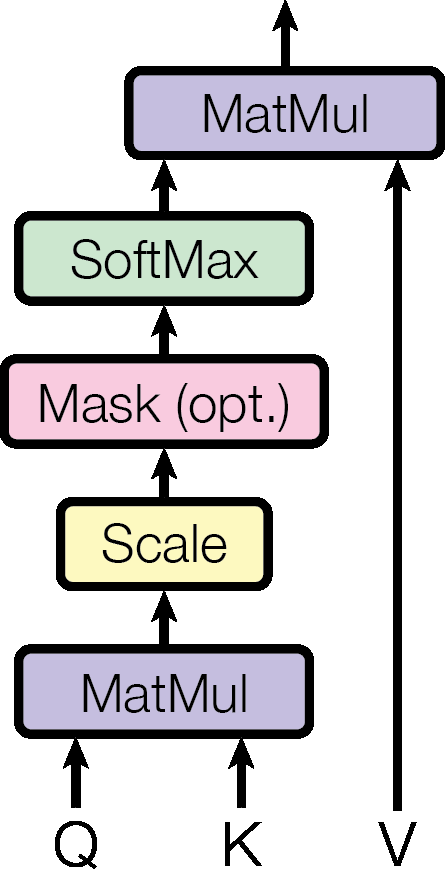

In [ ]:
img